# Statystical analysis of dataframe "Predicting Depression, Anxiety, and Stress"

Link to dataset: https://www.kaggle.com/yamqwe/depression-anxiety-stress-scales;
Dataset owner: Yam Peleg

## Introduction

The dataframe used for this statistical analysis is a collection of filled surveys from 2017 to 2019. This survey is "an on-line version of the Depression Anxiety Stress Scales (DASS)" - "a set of three self-report scales designed to measure the negative emotional states of depression, anxiety and stress". 

The intention behind DASS was "to further the process of defining, understanding, and measuring the ubiquitous and clinically significant emotional states usually described as depression, anxiety, and stress." 

"Each of three DASS scales contains 14 items, divided into subscales of 2-5 items with similar content." Each statement - item - is evaluated by participant by using "4-point severity/frequency scales to rate the extent to which they have experienced each state over the past week." The severity of depression, anxiety, and stress is "calculated by summing the scores for the relevant items."

The severity ratings of DASS scales are shown in the chart below:


![title](DASS_Severity_Ratings.png)

For more informations please refer to http://www2.psy.unsw.edu.au/dass/over.htm site that describes in a little more details the DASS scale.

Before I form any hypotheses, I will first of all import df -dataframe - and clean data.

In [ ]:
# Import and set options for df since
# the df has above 40000 lines

import pandas as pd
# import pingouin as pg
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import os, os.path as op

plt.style.use('seaborn-muted')


df = pd.read_csv(op.join(os.getcwd(), "data.csv"), sep='\t')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)
print(df.head())


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


   Q1A  Q1I   Q1E  Q2A  Q2I   Q2E  Q3A  Q3I   Q3E  Q4A  Q4I   Q4E  Q5A  Q5I  \
0    4   28  3890    4   25  2122    2   16  1944    4    8  2044    4   34   
1    4    2  8118    1   36  2890    2   35  4777    3   28  3090    4   10   
2    3    7  5784    1   33  4373    4   41  3242    1   13  6470    4   11   
3    2   23  5081    3   11  6837    2   37  5521    1   27  4556    3   28   
4    2   36  3215    2   13  7731    3    5  4156    4   10  2802    4    2   

    Q5E  Q6A  Q6I   Q6E  Q7A  Q7I   Q7E  Q8A  Q8I   Q8E  Q9A  Q9I   Q9E  Q10A  \
0  2153    4   33  2416    4   10  2818    4   13  2259    2   21  5541     1   
1  5078    4   40  2790    3   18  3408    4    1  8342    3   37   916     2   
2  3927    3    9  3704    1   17  4550    3    5  3021    2   32  5864     4   
3  3269    3   26  3231    4    2  7138    2   19  3079    3   31  9650     3   
4  5628    2    9  6522    4   34  2374    4   11  3054    4    7  2975     3   

   Q10I  Q10E  Q11A  Q11I  Q11E  Q12A 

## Structure of the data

I strongly believe, that it's important for the reader to read survey and df description before reading the rest of the statistical analysis. However, I am going to point out most important things about the data collected.

- Each row is a fulfilled survey, from particular person, who agreed to complete a short survey research;
- The first part of the questionnaire is a DASS test consisting of 42 questions. In the df, the columns are named as "Q", followed by the question's number and variable:
    - "A" - answer of the question as integers:
        - "1" - "Did not apply to me at all";
        - "2" - "Applied to me to some degree, or some of the time";
        - "3" - "Applied to me to a considerable degree, or a good part of the time";
        - "4" - "Applied to me very much, or most of the time";
    - "E" - time taken in miliseconds to answer the question;
    - "I" - question's position in the survey;
- "country", "source", "introelapse", "testelapse" and "surveyelapse" are data measured from the server's side;

- Next 10 columns beginning with "TIPI" are questions from "Ten item Personality Inventory". Descriptions with possible answers are shown in the photos below:

![title](TIPI.png)

- Next was a checklist - named "VCL_" - and subject's were asked to "check all words whose definitions you are sure you know". VCL6, VCL9, and VCL12 are not real words that can be used for validity check. "1" means checked and "0" unchecked;
- Then the subject's were asked another demographic questions:

![title](demographic_questions.png)

- Last part of columns are technical informations:

![title](technical.png)


## Cleaning data

First of all, even though the data frame looks clean at first glance, I am going to perform few checks to be sure that df is clear of any deviating answers. As for null answers, I discovered that only the column called "majors" has null values, which is perfectly fine since some people haven't finished school.

Secondly, as said before, author of the survey has prepared a validity check, to ensure that the survey hasn't been filled by bot or carelessly by a participants. Knowing that, I am going to drop all rows that contain "1" in columns VCL6, VCL9, and VCL12 for the purpose of eliminating deviant answers.

Thirdly, df also contains technical informations about the participants. There is special column called uniquenetworklocation, that specifies if the answer has been submitted only once ("1") or multiple times ("2") from particular network. Since, there is a chance that multiple people could have answer the survey from the same network location, I am going only to drop those positions that are duplicates.

Lastly, I discovered during glancing over the columns, that there are some columns which have zeros when the participant haven't checked the answer for particular questions. While checking selectively few DASS questions, I couldn't find any zeros, which means that answers weren't saved if there was no answer to particular DASS question. There are also zeros in validity check, which I am going to omit during dropping rows. For this statistical analysis, I am going to save only those that have fully fulfilled research survey.

In [ ]:
print("df size: ", len(df)) # 39_995 rows

df = df.loc[(df['VCL6'] != 1) & (df['VCL9'] != 1) & (df['VCL12'] != 1)] 
print("df size after validity check: ", len(df)) # 5_192 rows dropped (validity check)

print("df size of subjects with the same location: ", len(df[df['uniquenetworklocation'] == 2]))
print("df size of subjects with the same location that are not duplicated: ", len(df[df['uniquenetworklocation'] == 2].drop_duplicates())) # Since there are no duplicates from
                                                                      # from the same network location,
                                                                      # I am not going to drop any    
df = df.loc[~df.isin({"TIPI1": [0], "TIPI2": [0], "TIPI3": [0], "TIPI4": [0],
             "TIPI5": [0], "TIPI6": [0], "TIPI7": [0], "TIPI8": [0],
             "TIPI9": [0], "TIPI10": [0], "education": [0], "urban": [0],
             "gender": [0], "engnat": [0], "age": [0], "hand": [0],
             "religion": [0], "orientation": [0], "race": [0], "voted": [0],
             "married": [0], "familysize": [0]}).any(1)]
print("df size after dropping unfulfilled researches: ", len(df)) # After dropping unfulfilled research surveys, another 5_723 rows were dropped

df["depression"] = df[["Q3A", "Q24A", "Q5A", "Q26A", "Q10A",
                        "Q31A", "Q13A", "Q34A", "Q16A", "Q37A",
                        "Q17A", "Q38A", "Q21A", "Q42A"]].apply(lambda x: x-1).sum(axis=1)

df["anxiety"] = df[["Q2A", "Q23A", "Q4A", "Q25A", "Q7A",
                    "Q28A", "Q9A", "Q30A", "Q15A", "Q36A",
                    "Q19A", "Q40A", "Q20A", "Q41A"]].apply(lambda x: x-1).sum(axis=1)

df["stress"] = df[["Q1A", "Q22A", "Q6A", "Q27A", "Q8A",
                   "Q29A", "Q11A", "Q32A", "Q12A", "Q33A",
                   "Q14A", "Q35A", "Q18A", "Q39A"]].apply(lambda x: x-1).sum(axis=1)

df['extraversion'] = ((df["TIPI1"] + (8 - df["TIPI6"])) / 2).round(1)
df['agreeableness'] = ((df["TIPI7"] + (8 - df["TIPI2"])) / 2).round(1)
df['conscientiousness'] = ((df["TIPI3"] + (8 - df["TIPI8"])) / 2).round(1)
df['emotional_stability'] = ((df["TIPI9"] + (8 - df["TIPI4"])) / 2).round(1)
df['openness_to_experiences'] = ((df["TIPI5"] + (8 - df["TIPI10"])) / 2).round(1)

df.drop(df[df['familysize'] > 14].index, inplace=True)
df.drop(df[df['age'] > 100].index, inplace = True)
print("df size after dropping deviating answers to age and familysize: ", len(df)) # After dropping unfulfilled research surveys, another 5_723 rows were dropped
df.to_csv("new_data.csv")

df size:  22088
df size after validity check:  19163
df size of subjects with the same location:  3878
df size of subjects with the same location that are not duplicated:  3878
df size after dropping unfulfilled researches:  15961
df size after dropping deviating answers to age and familysize:  15950


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

## Statistical analysis #1

### Do subjects, that have finished university degree or graduate degree, differ in stress score from subjects, that have finished only high school or less than high school?

#### H0: Subjects, that have finished university degree or graduate degree, do not differ in stress score from subjects, that have finished only high school or less than high school.

#### HA: Subjects, that have finished university degree or graduate degree, differ in stress score from subjects, that have finished only high school or less than high school.

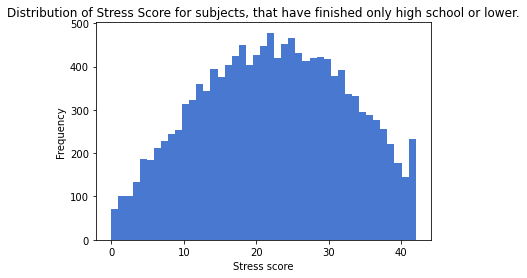

Sample size: 13622
                  W  pval  normal
stress  1434.960727   0.0   False


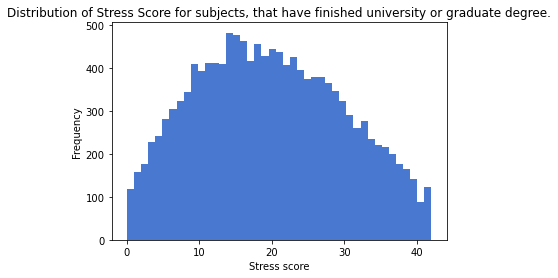

Sample size: 13622
                  W  pval  normal
stress  1480.790796   0.0   False
LeveneResult(statistic=0.43132083189794357, pvalue=0.5113470946456975)


In [ ]:
group_1 = df.copy()
group_1["education"] = group_1['education'].apply(lambda x: 1 if x <= 2 else 2)
group_1 = group_1[["education", "stress"]]
np.random.seed(1234)
rand = np.random.choice(len(group_1.loc[group_1['education'].isin([2])]),
                        size=len(group_1.loc[group_1['education'].isin([2])]) - len(group_1.loc[group_1['education'].isin([1])]),
                        replace=False)
group_1.sort_values(by="education", ascending=False, inplace=True)
group_1.reset_index(inplace=True, drop=True)
group_1.drop(rand, inplace=True)

for i in range(1, 3):
    plt.hist(group_1["stress"].loc[group_1['education'].isin([i])], bins =43)
    plt.ylabel("Frequency")
    plt.xlabel("Stress score")
    if i == 1:
        plt.title("Distribution of Stress Score for subjects, that have finished only high school or lower.")
    else:
        plt.title("Distribution of Stress Score for subjects, that have finished university or graduate degree.")
    plt.show()
    print("Sample size:", len(group_1["stress"].loc[group_1['education'].isin([i])]))
    print(pg.normality(group_1["stress"].loc[group_1['education'].isin([i])], method='normaltest'))

print(stats.levene(group_1["stress"].loc[group_1['education'].isin([1])], group_1["stress"].loc[group_1['education'].isin([2])]))

Before performing student's unpaired t-test, I performed two tests, ks test and lavene test, in order to check if the samples match the assumptions for the t-test. 

1. The ks tests have shown that the samples violate the assumption of normality;
2. The levene test has shown that there is homogeneity of variances in samples;
3. Since two groups differed in size, I randomly dropped 1600 rows to have two, equal in size, groups. 

Even though there is one violation of assumptions of student's unpaired t-test, I am going to still perform the t-test knowing the fact that t-test is resistant, bearing in mind that the result may differ from the actual truth. 

                T    dof alternative         p-val         CI95%   cohen-d  \
T-test  20.441375  27242   two-sided  3.528536e-92  [2.32, 2.81]  0.247688   

             BF10  power  
T-test  1.365e+88    1.0  
                   M         SD
education                      
1          22.284466  10.321314
2          19.721333  10.375096


[Text(0, 0, 'High school or less'), Text(1, 0, 'University or higher')]

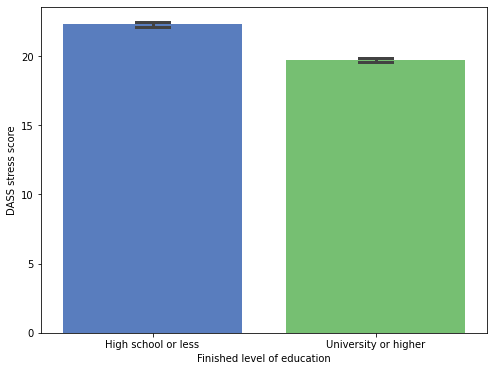

In [ ]:
print(pg.ttest(group_1["stress"].loc[group_1['education'].isin([1])], group_1["stress"].loc[group_1['education'].isin([2])]))

print(group_1.groupby("education").agg(M=("stress", np.mean), SD=("stress", np.std)))

fig, ax = plt.subplots(figsize=(8, 6))


sns.barplot(x='education',y='stress',data=group_1,
            order=[1, 2],capsize=.15,errwidth=3)

ax.set_xlabel("Finished level of education")
ax.set_ylabel("DASS stress score")

ax.set_xticklabels(["High school or less","University or higher"])


###### Interpretation

In order to analyze, if subjects, that have finished university degree or graduate degree, do not differ in stress score from subjects, that have finished only high school or less than high school, the student's unpaired t-test has been used. The result of the analysis is statistically significant, t(27242) = 20.44; p < 0.001; d = 0.25, meaning that I can reject null hypothesis. The d-cohen variable indicates, that there is weak effect of education level. Subjects, that have finished only high school or less than high school (M = 22.28, SD = 10.32), have higher stress scores than subjects, that have finished university degree or graduate degree (M = 19.72, SD = 10.38). The alternative hypothesis was confirmed with possibility that the actual results may differ from the truth.


## Statistical analysis #2

### Do subjects, that differ in the type of area they lived (rural, suburban, urban), when they were a kid, differ in Big-five's agreeableness dimension score?

#### H0: Subjects, that differ in the type of area they lived (rural, suburban, urban), when they were a kid, do not differ in Big-five's agreeableness dimension score.

#### HA: Subjects, that differ in the type of area they lived (rural, suburban, urban), when they were a kid, differ in Big-five's agreeableness dimension score.

In [ ]:
group_2 = df.copy()
group_2 = group_2[["urban", "agreeableness"]]

np.random.seed(18)
rand = np.random.choice(len(group_2.loc[group_2['urban'].isin([2])]),
                        size=len(group_2.loc[group_2['urban'].isin([2])]) - len(group_2.loc[group_2['urban'].isin([1])]),
                        replace=False)
group_2["ind"] = group_2["urban"].map({1:2, 2:1, 3:3})
group_2.sort_values(by="ind", ascending=True, inplace=True)
group_2.reset_index(inplace=True, drop=True)
group_2.drop(rand, inplace=True)
group_2.drop("ind", axis=1)

np.random.seed(3)
rand = np.random.choice(len(group_2.loc[group_2['urban'].isin([3])]),
                        size=len(group_2.loc[group_2['urban'].isin([3])]) - len(group_2.loc[group_2['urban'].isin([1])]),
                        replace=False)
group_2.sort_values(by="urban", ascending=False, inplace=True)
group_2.reset_index(inplace=True, drop=True)
group_2.drop(rand, inplace=True)

                       W      pval  normal
agreeableness  12.456424  0.001973   False
                       W      pval  normal
agreeableness  24.370778  0.000005   False
                       W     pval  normal
agreeableness  14.140845  0.00085   False
LeveneResult(statistic=2.4312904677268588, pvalue=0.08795253606468152)


Text(0.5, 1.0, 'Urban')

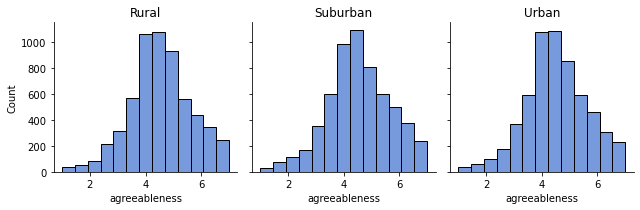

In [ ]:
print(pg.normality(group_2["agreeableness"].loc[group_2['urban'].isin([1])], method='normaltest'))
print(pg.normality(group_2["agreeableness"].loc[group_2['urban'].isin([2])], method='normaltest'))
print(pg.normality(group_2["agreeableness"].loc[group_2['urban'].isin([3])], method='normaltest'))

print(stats.levene(group_2["agreeableness"].loc[group_2['urban'].isin([1])],
             group_2["agreeableness"].loc[group_2['urban'].isin([2])],
             group_2["agreeableness"].loc[group_2['urban'].isin([3])]))

g = sns.FacetGrid(data=group_2, col='urban')
g.map_dataframe(sns.histplot, x="agreeableness", bins=13)
g.axes[0,0].set_title('Rural')
g.axes[0,1].set_title('Suburban')
g.axes[0,2].set_title('Urban')

Before performing one-way anova test, I performed two tests, ks test and lavene test, in order to check if the samples match the assumptions for the one-way anova: 

1. The ks tests have shown that the samples violate the assumption of normality;
2. The levene test has shown that there is homogeneity of variances in samples;
3. Since three groups differed in size, I randomly choose subject's from 2 biggest samples to match size of the smallest one.

Even though there is one violation of assumptions of one-way anova test, I am going to still perform the anova knowing the fact that anova is resistant, bearing in mind that the result may differ from the actual truth. 

  Source  ddof1  ddof2         F     p-unc      np2
0  urban      2  17775  1.245483  0.287827  0.00014
              M        SD
urban                    
1      4.581421  1.199083
2      4.587243  1.225185
3      4.554421  1.199486


[Text(0, 0, 'Rural'), Text(1, 0, 'Suburban'), Text(2, 0, 'Urban')]

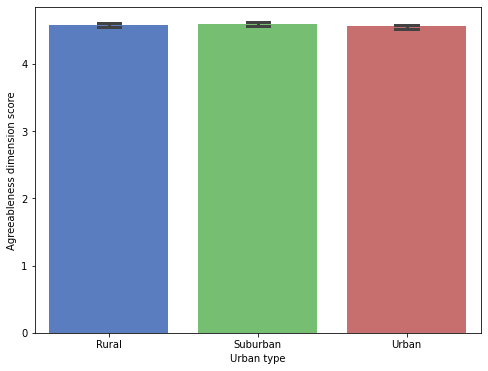

In [ ]:
print(pg.anova(data=group_2, dv="agreeableness", between="urban"))
print(group_2.groupby("urban").agg(M=("agreeableness", np.mean), SD=("agreeableness", np.std)))

fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x="urban", y="agreeableness", data=group_2,
                      order=[1, 2, 3], capsize=.15, errwidth=3)
ax.set_xlabel("Urban type")
ax.set_ylabel("Agreeableness dimension score")
ax.set_xticklabels(("Rural", "Suburban", "Urban"))

#### Interpretation

In order to analyze, if subjects, that differ in the type of area they lived (rural, suburban, urban), when they were a kid, differ in Big-five's agreeableness dimension score, the one-way anova test has been used. The result of the analysis is statistically insignificant, F(2, 17775) = 1.25 ; p = 0.29 ; np2 < 0.001, meaning that I can't reject null hypothesis. Hence, there is no statistical difference, in result of agreeableness dimension, between subject's that lived in different types of areas. 

## Statistical analysis #3

### Are Big-Five personality dimension's correlated with depression, anxiety, and stress scores?

Corr extraversion-depression:
              n         r           CI95%  p-val BF10  power
pearson  28842 -0.296347  [-0.31, -0.29]    0.0  inf    1.0
Corr agreeableness-depression:
              n         r           CI95%          p-val        BF10  power
pearson  28842 -0.156877  [-0.17, -0.15]  2.660408e-158  8.092e+153    1.0
Corr emotional_stability-depression:
              n         r           CI95%  p-val BF10  power
pearson  28842 -0.529041  [-0.54, -0.52]    0.0  inf    1.0
Corr conscientiousness-depression:
              n         r           CI95%  p-val BF10  power
pearson  28842 -0.299704  [-0.31, -0.29]    0.0  inf    1.0
Corr openness_to_experiences-depression:
              n         r           CI95%  p-val BF10  power
pearson  28842 -0.239514  [-0.25, -0.23]    0.0  inf    1.0


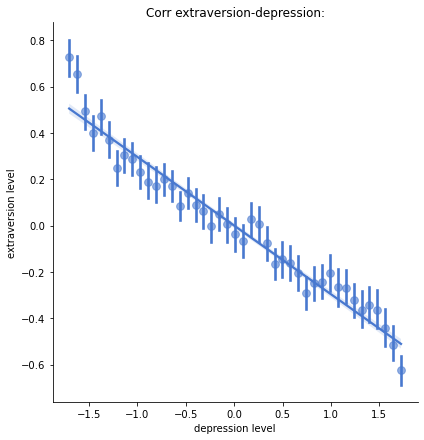

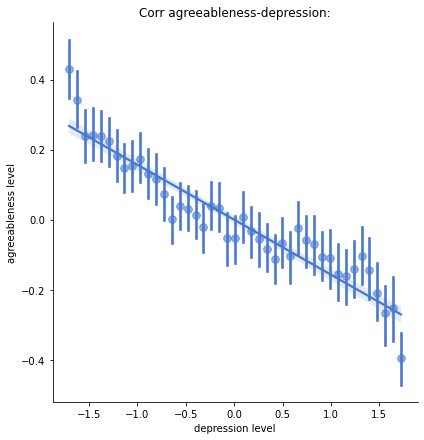

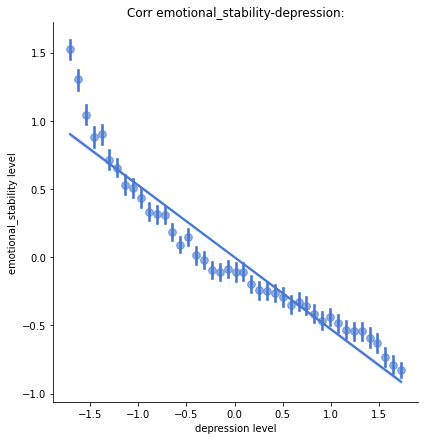

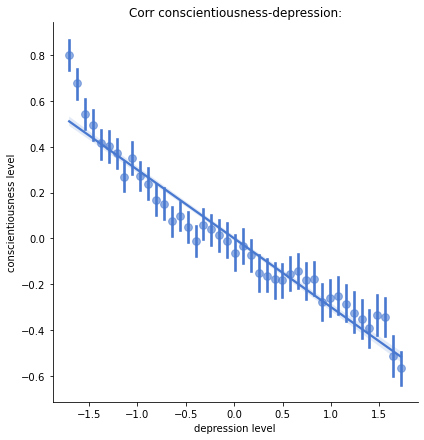

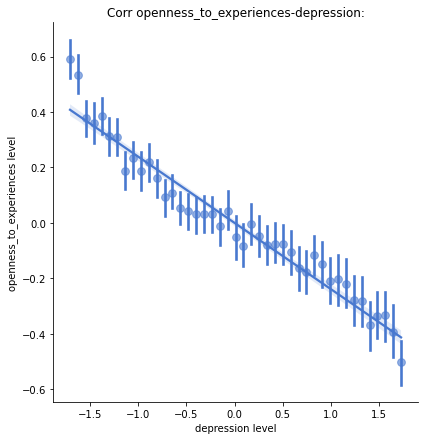

In [ ]:
group_3 = df.copy()
group_3 = group_3[["extraversion", "agreeableness",
                   "emotional_stability", "conscientiousness",
                   "openness_to_experiences", "depression"]]
group_3.reset_index(inplace=True, drop=True)
group_3 = (group_3 - group_3.mean()) / group_3.std()

for tipi in ["extraversion", "agreeableness",
             "emotional_stability", "conscientiousness",
             "openness_to_experiences"]:
    textt = f"Corr {tipi}-depression:"
    print(textt + "\n", pg.corr(x=group_3[tipi], y=group_3["depression"]))
    g = sns.lmplot(y=tipi, x="depression", data=group_3, height = 6, x_estimator = np.mean, scatter_kws={"s": 60, "alpha":0.6})
    g.set(xlabel="depression level", ylabel=f"{tipi} level", title=textt)


Corr extraversion-anxiety:
              n         r           CI95%          p-val        BF10  power
pearson  28842 -0.178834  [-0.19, -0.17]  7.271286e-206  2.578e+201    1.0
Corr agreeableness-anxiety:
              n         r          CI95%         p-val       BF10  power
pearson  28842 -0.109597  [-0.12, -0.1]  8.984404e-78  3.469e+73    1.0
Corr emotional_stability-anxiety:
              n         r           CI95%  p-val BF10  power
pearson  28842 -0.538195  [-0.55, -0.53]    0.0  inf    1.0
Corr conscientiousness-anxiety:
              n         r           CI95%  p-val BF10  power
pearson  28842 -0.238654  [-0.25, -0.23]    0.0  inf    1.0
Corr openness_to_experiences-anxiety:
              n         r          CI95%          p-val        BF10  power
pearson  28842 -0.211869  [-0.22, -0.2]  5.321554e-290  2.935e+285    1.0


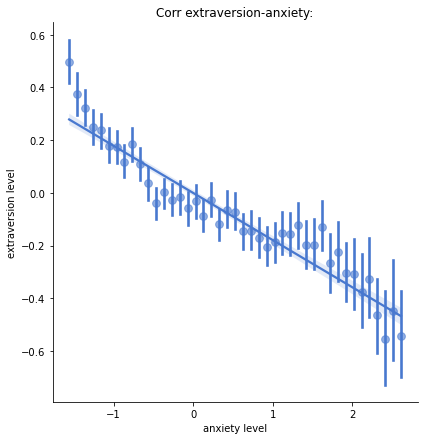

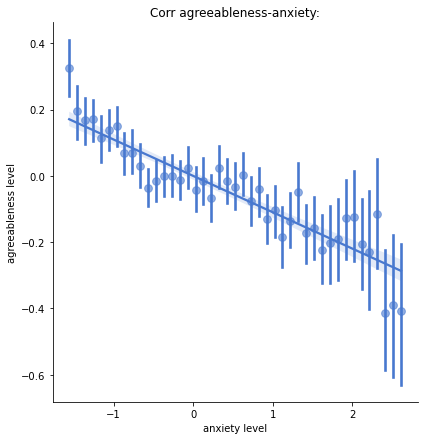

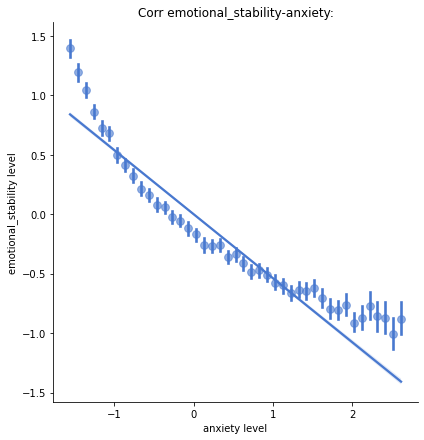

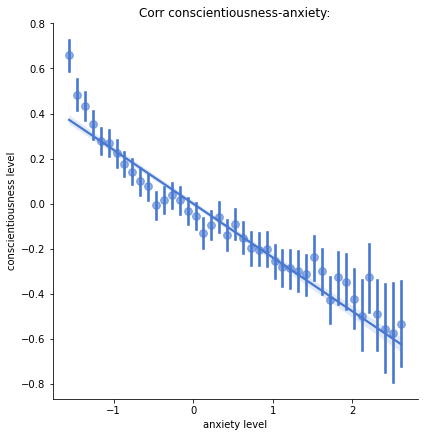

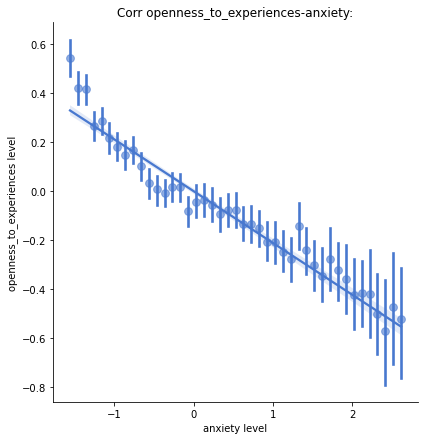

In [ ]:
group_4 = df.copy()
group_4 = group_4[["extraversion", "agreeableness",
                   "emotional_stability", "conscientiousness",
                   "openness_to_experiences", "anxiety"]]
group_4.reset_index(inplace=True, drop=True)
group_4 = (group_4 - group_4.mean()) / group_4.std()

for tipi in ["extraversion", "agreeableness",
             "emotional_stability", "conscientiousness",
             "openness_to_experiences"]:
    textt = f"Corr {tipi}-anxiety:"
    print(textt + "\n", pg.corr(x=group_4[tipi], y=group_4["anxiety"]))
    g = sns.lmplot(y=tipi, x="anxiety", data=group_4, height = 6, x_estimator = np.mean, scatter_kws={"s": 60, "alpha":0.6})
    g.set(xlabel="anxiety level", ylabel=f"{tipi} level", title=textt)

Corr extraversion-stress:
              n         r           CI95%          p-val        BF10  power
pearson  28842 -0.176542  [-0.19, -0.17]  1.361758e-200  1.396e+196    1.0
Corr agreeableness-stress:
              n         r           CI95%          p-val        BF10  power
pearson  28842 -0.197136  [-0.21, -0.19]  1.394995e-250  1.211e+246    1.0
Corr emotional_stability-stress:
              n         r           CI95%  p-val BF10  power
pearson  28842 -0.650544  [-0.66, -0.64]    0.0  inf    1.0
Corr conscientiousness-stress:
              n         r           CI95%  p-val BF10  power
pearson  28842 -0.230052  [-0.24, -0.22]    0.0  inf    1.0
Corr openness_to_experiences-stress:
              n         r           CI95%          p-val        BF10  power
pearson  28842 -0.202869  [-0.21, -0.19]  1.482045e-265  1.105e+261    1.0


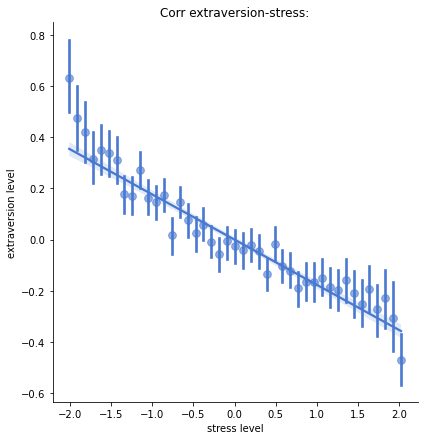

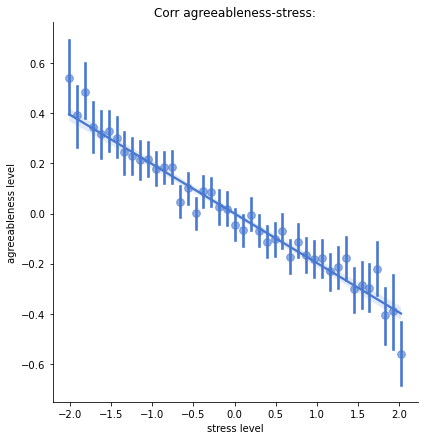

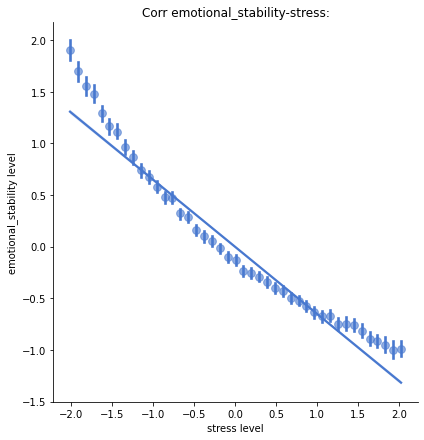

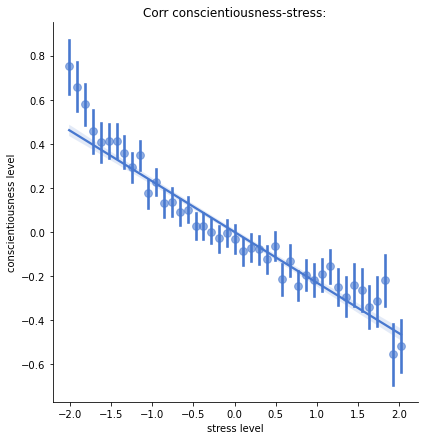

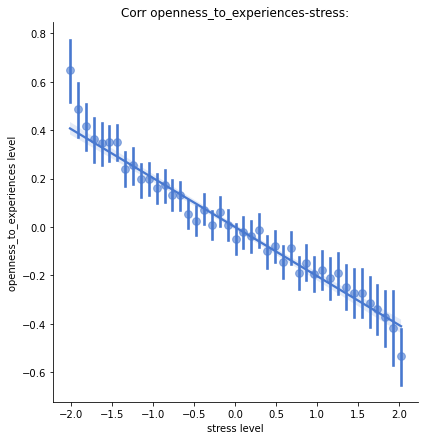

In [ ]:
group_5 = df.copy()
group_5 = group_5[["extraversion", "agreeableness",
                   "emotional_stability", "conscientiousness",
                   "openness_to_experiences", "stress"]]
group_5.reset_index(inplace=True, drop=True)
group_5 = (group_5 - group_5.mean()) / group_5.std()

for tipi in ["extraversion", "agreeableness",
             "emotional_stability", "conscientiousness",
             "openness_to_experiences"]:
    textt = f"Corr {tipi}-stress:"
    print(textt + "\n", pg.corr(x=group_5[tipi], y=group_5["stress"]))
    g = sns.lmplot(y=tipi, x="stress", data=group_5, height = 6, x_estimator = np.mean, scatter_kws={"s": 60, "alpha":0.6})
    g.set(xlabel="stress level", ylabel=f"{tipi} level", title=textt)

#### Interpretation

In order to analyze, if subjects' Big-Five personality dimensions are correlated with depression, anxiety, and stress, the Pearson Correlation Tests has been used. All of the results of the analyses are statistically significant, differentiating in strength of the correlations:

- Weak, negative correlation between extraversion - depression: r = -0.3, p < 0.001;
- Weak, negative correlation between agreeableness - depression: r = -0.16, p < 0.001;
- Strong, negative correlation between emotional stability - depression: r = -0.53, p < 0.001;
- Weak, negative correlation between conscientiousness - depression: r = -0.3, p < 0.001;
- Weak, negative correlation between openness to experiences - depression: r = -0.24, p < 0.001;
- Weak, negative correlation between extraversion - anxiety: r = -0.18, p < 0.001;
- Weak, negative correlation between agreeableness - anxiety: r = -0.11, p < 0.001;
- Strong, negative correlation between emotional stability - anxiety: r = -0.54, p < 0.001;
- Weak, negative correlation between conscientiousness - anxiety: r = -0.24, p < 0.001;
- Weak, negative correlation between openness to experiences - anxiety: r = -0.21, p < 0.001;
- Weak, negative correlation between extraversion - stress: r = -0.18, p < 0.001;
- Weak, negative correlation between agreeableness - stress: r = -0.2, p < 0.001;
- Strong, negative correlation between emotional stability - stress: r = -0.65, p < 0.001;
- Weak, negative correlation between conscientiousness - stress: r = -0.23, p < 0.001;
- Weak, negative correlation between openness to experiences - stress: r = -0.20, p < 0.001;


## Statistical analysis #4

### Prediciting subject's depression level (score) based on own age.

In [ ]:
group_6 = df.copy()
group_6 = group_6[["age", "depression"]]
group_6.reset_index(inplace=True, drop=True)

def fmodel(model, rnd=2):
    
    p = model.f_pvalue
    
    ptext = f"< 0.001" if p < 0.001 else f"= {np.around(p, rnd)}"
    
    return f"F({int(model.df_model)}, {int(model.df_resid)}) = {np.around(model.fvalue, rnd)} ; p {ptext}"
    

In [ ]:
model = smf.ols("depression ~ age", data=group_6).fit()
results = model.summary()
results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             depression   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     485.3
Date:                Wed, 26 Jan 2022   Prob (F-statistic):          1.15e-106
Time:                        23:50:39   Log-Likelihood:            -1.1294e+05
No. Observations:               28842   AIC:                         2.259e+05
Df Residuals:                   28840   BIC:                         2.259e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.2725      0.212    119.224      0.000      24.857      25.688
age           -0.1871      0.008    -22.029      0.000      -0.204      -0.170
==============================================================================
Omnibus:                    12473.917   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1494.398
Skew:                           0.067   Prob(JB):                         0.00
Kurtosis:                       1.893   Cond. No.                         74.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
print(fmodel(model))

F(1, 28840) = 485.27 ; p < 0.001


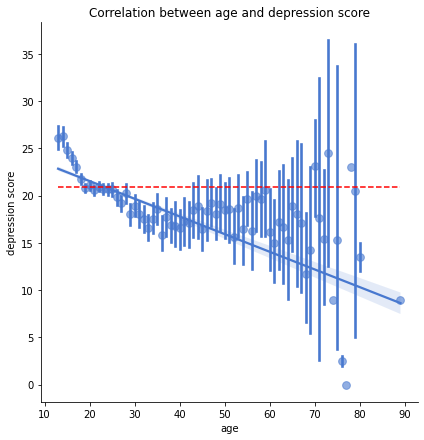

In [ ]:
g = sns.lmplot(x="age", y="depression", data=group_6, height = 6, x_estimator = np.mean, scatter_kws={"s": 60, "alpha":0.6})
plt.hlines(y=group_6["depression"].mean(), xmin=13, xmax=89, color="red", linestyles="dashed")
g.set(ylabel="depression score", title="Correlation between age and depression score")

In [ ]:
pg.corr(x = group_6["depression"], y = group_6["age"])

,n,r,CI95%,p-val,BF10,power
pearson,28842,-0.128639,"[-0.14, -0.12]",1.154766e-106,2.291e+102,1.0


### Interpretation

In order to analyze, if subject's depression score can be predicted by subject's age, the linear regression has been used. Proposed model allows for predicting depression score, F(1, 28840) = 485.27 ; p < 0.001. Linear regression line's equation could be written down with formula: depression = 25.2725 - 0.1871 * age. Proposed model explains 1.7% depression's standard deviations. Subject's age is weakly and negatively correlated with subject's depression score (r = -0.013 ; p < 0.001).

In [ ]:
import pandas as pd
from pycaret.classification import *


ModuleNotFoundError: ignored